# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
import os
import warnings 
warnings.filterwarnings("ignore")

# Loading Datasets

In [2]:
os.chdir("C:\\Data_Sets\\Data_Science_Course\\Case_study_floder\\Python Foundation Case Study 3 - Insurance Claims Case Study  case 5\\Case Study 3 - Insurance Claims Case Study")

In [3]:
Claims = pd.read_csv("claims.csv")
Cust_demo = pd.read_csv("cust_demographics.csv")

# Data Preparation And Cleaning

In [4]:
Claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No


In [5]:
Cust_demo.head(1)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum


#### Merging the datasets together.

In [6]:
Cust_Claims = pd.merge(Claims,Cust_demo,left_on="customer_id",right_on="CUST_ID",how="inner")

In [7]:
Cust_Claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


#### Obsevation

In [8]:
Cust_Claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
5,91609100,47830476,Natural causes,04/12/2017,Auto,Unknown,Material only,$1440,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
6,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No,19269962,Male,13-May-77,NV,956-871-8691,Gold
7,39219616,19269962,Other causes,09/26/2018,Auto,No,Material only,$2240,2.0,No,19269962,Male,13-May-77,NV,956-871-8691,Gold
8,24050443,21831191,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes,21831191,Male,17-May-77,NH,419-712-8513,Gold
9,91475471,21831191,Driver error,02/09/2018,Auto,Unknown,Material and injury,$36810,1.0,No,21831191,Male,17-May-77,NH,419-712-8513,Gold


In [9]:
Cust_Claims.tail(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
1075,28084004,82089910,Driver error,06/03/2018,Auto,No,Material only,$2780,1.0,No,82089910,Male,09-Oct-73,FL,257-248-4825,Silver
1076,87294246,57452643,Crime,01/21/2017,Home,No,Material only,$1380,3.0,No,57452643,Female,10-Jul-81,HI,348-562-2673,Platinum
1077,91386759,65208809,Natural causes,10/30/2018,Auto,No,Material only,$2290,1.0,No,65208809,Male,22-Apr-64,VA,286-128-6132,Platinum
1078,47457836,6756905,Driver error,01/21/2017,Auto,No,Material only,$2320,3.0,No,6756905,Male,21-Oct-97,NE,924-427-8125,Silver
1079,72025178,46850495,Other causes,11/27/2017,Auto,Yes,Material only,$2173.5,1.0,Yes,46850495,Male,21-Aug-62,NV,761-193-2346,Platinum
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver
1084,63226031,61575264,Natural causes,03/16/2017,Auto,No,Material only,$1490,1.0,No,61575264,Male,12-Jul-95,WY,182-385-1392,Gold


In [10]:
Cust_Claims.shape

(1085, 16)

In [11]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

###### Changing datatypes of date columns to datetime, claim_amount  and contact to integer or float type.

In [12]:
Cust_Claims["claim_date"] = pd.to_datetime(Cust_Claims["claim_date"])

In [13]:
Cust_Claims["DateOfBirth"] = pd.to_datetime(Cust_Claims["DateOfBirth"])

In [14]:
Cust_Claims["claim_amount"] = Cust_Claims["claim_amount"].str.replace("$","")

In [15]:
Cust_Claims["claim_amount"] = pd.to_numeric(Cust_Claims["claim_amount"])

In [16]:
Cust_Claims["Contact"] = Cust_Claims["Contact"].str.replace("-","")

In [17]:
Cust_Claims["Contact"] = pd.to_numeric(Cust_Claims["Contact"])

In [18]:
Cust_Claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

###### lets see the summary statistic of numerical columns

In [19]:
Cust_Claims.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_id,1085.0,4.891553e+07,2.912818e+07,2.683200e+04,2.404606e+07,4.855975e+07,7.404400e+07,9.977548e+07
customer_id,1085.0,5.076790e+07,2.849625e+07,1.545570e+05,2.645062e+07,4.975949e+07,7.609396e+07,9.996199e+07
claim_amount,1020.0,1.246768e+04,1.378325e+04,1.000000e+03,1.870000e+03,2.740000e+03,2.426000e+04,4.815050e+04
total_policy_claims,1075.0,1.586977e+00,1.146859e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,8.000000e+00
CUST_ID,1085.0,5.076790e+07,2.849625e+07,1.545570e+05,2.645062e+07,4.975949e+07,7.609396e+07,9.996199e+07
Contact,1085.0,5.631369e+09,2.592713e+09,1.233463e+09,3.481866e+09,5.737193e+09,7.858943e+09,9.865419e+09


In [20]:
Cust_Claims.describe(include="object").T

,count,unique,top,freq
incident_cause,1085,5,Other causes,285
claim_area,1085,2,Auto,970
police_report,1085,3,No,621
claim_type,1085,3,Material only,653
fraudulent,1085,2,No,838
gender,1085,2,Male,556
State,1085,50,NY,31
Segment,1085,3,Gold,375


###### Checking for Duplicates Values.

In [21]:
Cust_Claims.duplicated().sum()

0

###### Checking for Null Values and filling with mean values after treating outliers.

In [22]:
Cust_Claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [23]:
Cust_Claims.fillna(Cust_Claims[["claim_amount",]].mean(),inplace=True)

In [24]:
Cust_Claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount            0
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

###### Looking for Continuous columns.

In [25]:
Continuous_col = Cust_Claims.select_dtypes("number")
Continuous_col.head(1)

,claim_id,customer_id,claim_amount,total_policy_claims,CUST_ID,Contact
0,54004764,21868593,2980.0,1.0,21868593,7899168172


###### Looking for Outliers in Continuous Columns.

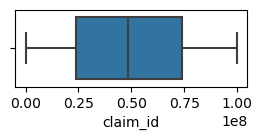

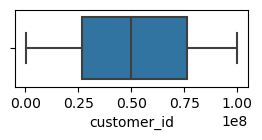

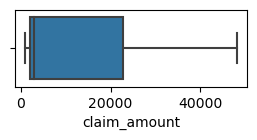

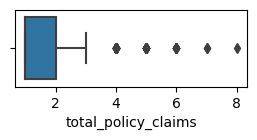

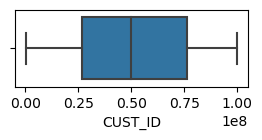

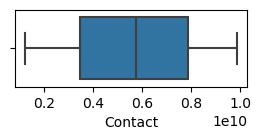

In [26]:
for i in Continuous_col:
    plt.figure(figsize=(3,1))
    sns.boxplot(data=Continuous_col,x=i)
    plt.show()

###### Outliers Treatment.

In [27]:
##outlier treatment

def treat_outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    return x.clip(lower=lr,upper=ur)

In [28]:
for column in Continuous_col.columns:
    Continuous_col[column]=treat_outlier(Continuous_col[column])

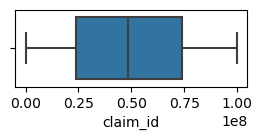

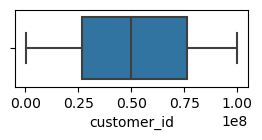

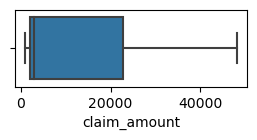

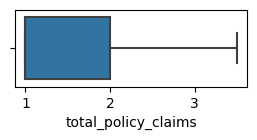

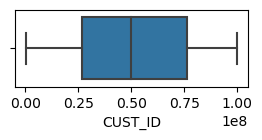

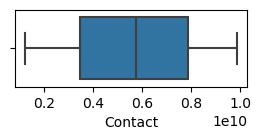

In [29]:
for i in Continuous_col.columns:
    plt.figure(figsize=(3,1))
    sns.boxplot(data=Continuous_col,x=i)
    plt.show()

###### Looking for Categorical columns.

In [30]:
Categorical_col = Cust_Claims.select_dtypes("object")
Categorical_col.head(1)

,incident_cause,claim_area,police_report,claim_type,fraudulent,gender,State,Segment
0,Driver error,Auto,No,Material only,No,Female,VT,Platinum


# Exploratory Analysis And Visualization

###### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [136]:
Cust_Claims.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [40]:
Cust_Claims["flag"] = np.where(Cust_Claims.police_report == "Unknown",1,0)
Cust_Claims.flag.head(2)

0    0
1    1
Name: flag, dtype: int32

###### One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column. 

In [41]:
Cust_Claims= Cust_Claims.drop_duplicates(subset="customer_id", keep= "last")

In [42]:
Cust_Claims.customer_id.duplicated().sum()

0

###### Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
###### Children < 18
###### Youth 18-30
###### Adult 30-60
###### Senior > 60

In [43]:
#Correcting the years of Customer Age 
current_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(Cust_Claims['DateOfBirth']).year        
s = dob_year-100                                               
a = current_year - s
t = current_year - dob_year
Cust_Claims['Age'] = np.where(dob_year > current_year,a,t)
Cust_Claims["Age"].head(1)

0    45
Name: Age, dtype: int64

In [46]:
#Making Age_Grp to identify Children,Youth,Adult,Senior.
Cust_Claims.loc[(Cust_Claims.Age<18),"Age_Grp"] = "Children"
Cust_Claims.loc[(Cust_Claims.Age>=18) & (Cust_Claims.Age<=30),"Age_Grp"] = "Youth"
Cust_Claims.loc[(Cust_Claims.Age >=30) & (Cust_Claims.Age <60),"Age_Grp"] = "Adult"
Cust_Claims.loc[(Cust_Claims.Age >=60),"Age_Grp"] = "Senior"

In [47]:
Cust_Claims.Age_Grp.value_counts()

Adult     805
Youth     141
Senior    132
Name: Age_Grp, dtype: int64

###### What is the average amount claimed by the customers from various segments?

In [48]:
Cust_Claims.groupby("Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12844.381375
Platinum,12370.240223
Silver,12264.410631


###### What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [49]:
round(Cust_Claims.loc[Cust_Claims.claim_date< "2018-10-01"].groupby(["incident_cause","claim_type"])[["claim_amount"]].sum(),2)

claim_amount
incident_cause     claim_type                       
Crime              Injury only             306308.50
                   Material and injury     203827.50
                   Material only           218472.41
Driver error       Injury only            1173607.73
                   Material and injury    1801847.68
                   Material only           354584.45
Natural causes     Injury only             411702.18
                   Material and injury     555043.18
                   Material only           354113.27
Other causes       Injury only            1603246.73
                   Material and injury    1956734.73
                   Material only           409747.18
Other driver error Injury only            1284780.86
                   Material and injury    1726164.41
                   Material only           313748.09

###### How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [50]:
Cust_Claims.loc[(Cust_Claims.incident_cause.str.lower().str.contains("driver") & ((Cust_Claims.State == "TX") | (Cust_Claims.State == "DE") | (Cust_Claims.State == "AK"))),:].groupby("State")["claim_amount"].count() 

State
AK    10
DE    15
TX    10
Name: claim_amount, dtype: int64

###### Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [52]:
grouped = Cust_Claims.groupby(['gender', 'Segment'])[["claim_amount"]].sum()
grouped

claim_amount
gender Segment               
Female Gold      2.109738e+06
       Platinum  2.369484e+06
       Silver    1.896862e+06
Male   Gold      2.655527e+06
       Platinum  2.096173e+06
       Silver    2.346624e+06

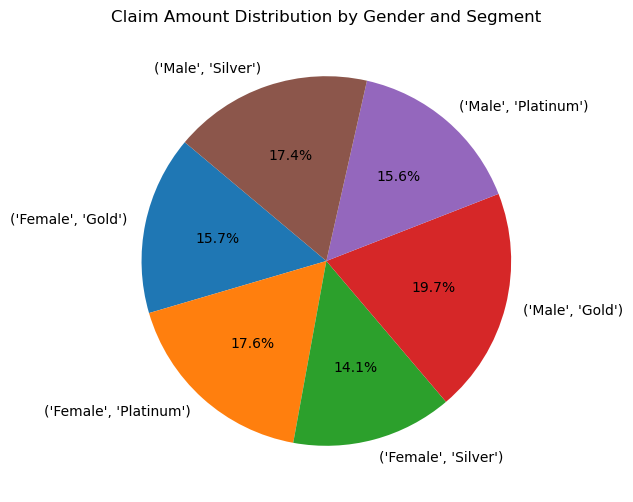

In [53]:
# Plotting
labels = []
sizes = []
for label, size in grouped['claim_amount'].items():
    labels.append(label)
    sizes.append(size)

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Claim Amount Distribution by Gender and Segment')
plt.show()

###### Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [54]:
gender_claim_amount = round(Cust_Claims.loc[Cust_Claims.incident_cause.str.lower().str.contains("driver"),:].groupby(["gender"])[["claim_amount"]].sum(),2)

<Figure size 1000x600 with 0 Axes>

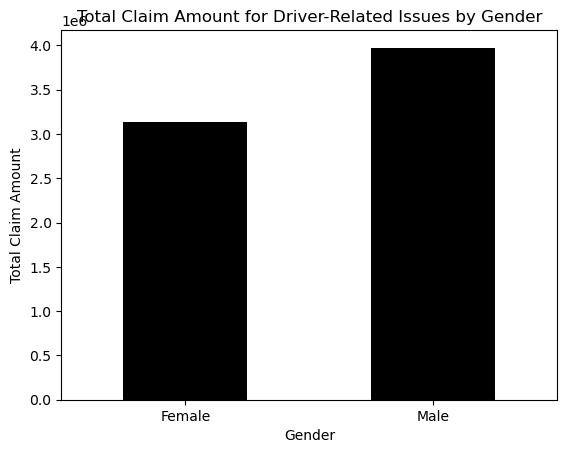

In [55]:
plt.figure(figsize=(10, 6))
gender_claim_amount.plot(kind="bar",color="k",legend = False)
plt.title("Total Claim Amount for Driver-Related Issues by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Claim Amount")
plt.xticks(rotation=0)
plt.show()

###### Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [56]:
agegrp_frad_policy = Cust_Claims.groupby(["Age_Grp","fraudulent"])[["total_policy_claims"]].count()

<Figure size 1000x600 with 0 Axes>

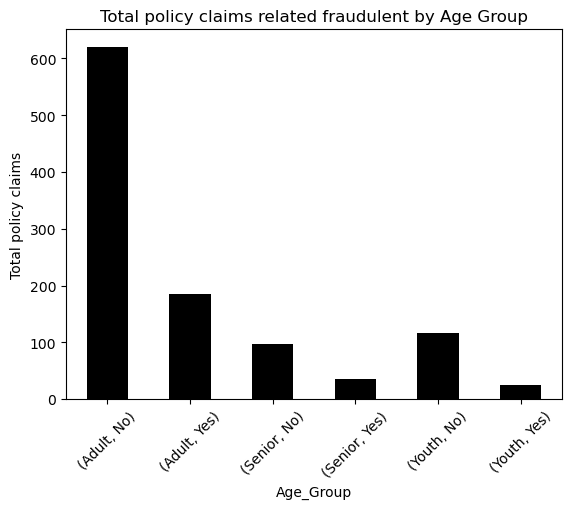

In [57]:
plt.figure(figsize=(10, 6))
agegrp_frad_policy.plot(kind="bar",legend =False,color="k")
plt.title("Total policy claims related fraudulent by Age Group")
plt.xlabel("Age_Group",)
plt.ylabel("Total policy claims")
plt.xticks(rotation=45)
plt.show()

###### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [58]:
Cust_Claims["Month"] = Cust_Claims["claim_date"].dt.month

In [59]:
monthly_claim_amount = round(Cust_Claims.groupby("Month")[["claim_amount"]].sum(),2)

<Figure size 1000x600 with 0 Axes>

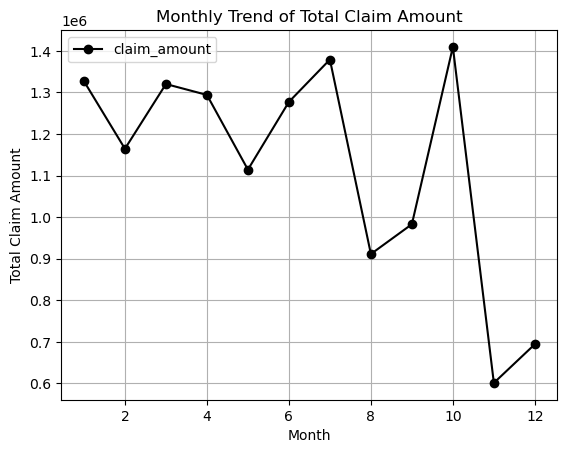

In [60]:
plt.figure(figsize=(10, 6))
monthly_claim_amount.plot(kind="line", marker="o", color="k")
plt.title("Monthly Trend of Total Claim Amount")
plt.xlabel("Month")
plt.ylabel("Total Claim Amount")
#plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

###### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims. 

In [61]:
Cust_Claims.head(1)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,flag,Age,Age_Grp,Month
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,7899168172,Platinum,0,45,Adult,11


In [62]:
Avg_claim_amount = Cust_Claims.groupby(["gender","Age_Grp","fraudulent"])[["claim_amount"]].mean().reset_index()

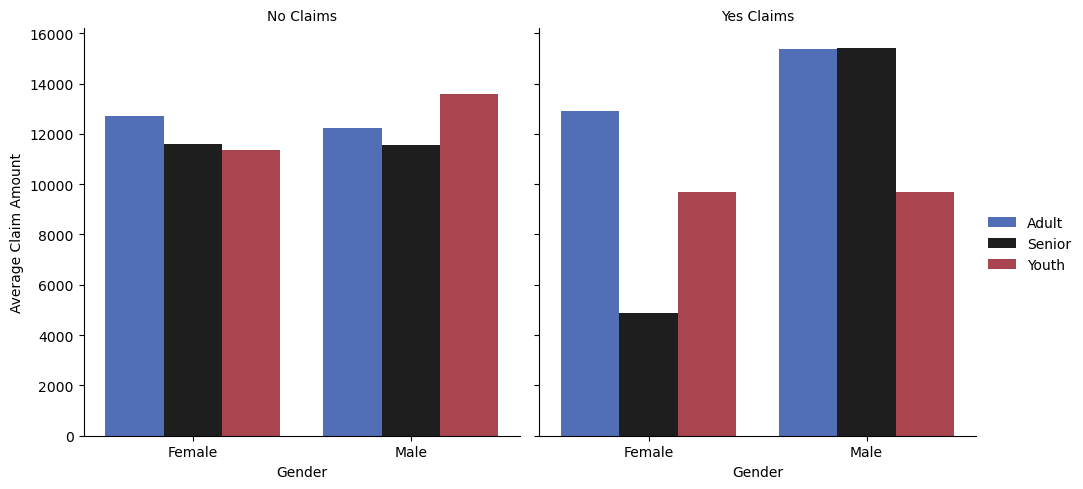

In [63]:
g = sns.FacetGrid(Avg_claim_amount, col="fraudulent", height=5, aspect=1)
g.map_dataframe(sns.barplot, x="gender", y="claim_amount", hue="Age_Grp", palette="icefire")# 
g.set_axis_labels("Gender", "Average Claim Amount")
g.set_titles("{col_name} Claims")
g.add_legend()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

###### Is there any similarity in the amount claimed by males and females?

In [66]:
female=Cust_Claims[Cust_Claims.gender=="Female"].claim_amount
male=Cust_Claims[Cust_Claims.gender=="Male"].claim_amount

In [67]:
t= stats.ttest_ind(female,male)
t

Ttest_indResult(statistic=-0.9626244628836415, pvalue=0.3359522932161124)

In [71]:
pvalue=0.3359522932161124
pcritical = 0.05
statistic=-0.9626244628836415

In [72]:
pvalue>pcritical

True

###### Is there any relationship between age category and segment?

In [79]:
observed = pd.crosstab(Cust_Claims.Segment,Cust_Claims.Age_Grp)
observed

Age_Grp,Adult,Senior,Youth
Segment,,,
Gold,278,45,48
Platinum,270,47,44
Silver,257,40,49


In [80]:
t1 = stats.chi2_contingency(observed)
t1

(0.8591966330667937,
 0.9303403339916204,
 4,
 array([[277.04545455,  45.42857143,  48.52597403],
        [269.57792208,  44.20408163,  47.21799629],
        [258.37662338,  42.36734694,  45.25602968]]))

In [81]:
pvalue = 0.9303403339916205
pcitical = 0.05
Statistic = 0.8591966330667935

In [82]:
pvalue>pcritical

True

###### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [87]:
Cust_Claims["Year"]= Cust_Claims['claim_date'].dt.year

In [90]:
round(Cust_Claims.groupby("Year")[["claim_amount"]].sum().reset_index(),2)

,Year,claim_amount
0,2017,7296678.62
1,2018,6177729.67


In [92]:
t2 = stats.ttest_1samp(Cust_Claims.Year,10000)
t2

Ttest_1sampResult(statistic=-526686.7734844973, pvalue=0.0)

In [93]:
pvalue=0.0
pcritical =0.05
statistic=-526686.7734844973

In [94]:
pvalue>pcritical

False

###### Is there any difference between age groups and insurance claims?

In [96]:
Cust_Claims.Age_Grp.value_counts()

Adult     805
Youth     141
Senior    132
Name: Age_Grp, dtype: int64

In [101]:
Adult =Cust_Claims[Cust_Claims.Age_Grp =="Adult"].total_policy_claims
Youth =Cust_Claims[Cust_Claims.Age_Grp =="Youth"].total_policy_claims
Senior =Cust_Claims[Cust_Claims.Age_Grp =="Senior"].total_policy_claims

In [102]:
t3 = stats.f_oneway(Adult,Youth,Senior)
t3

F_onewayResult(statistic=0.39304909857794307, pvalue=0.6750925683548596)

In [103]:
pvalue=0.6750925683548596
pcritical = 0.05
statistic=0.39304909857794307

In [104]:
pvalue>pcritical

True

###### Is there any relationship between total number of policy claims and the claimed amount?

In [139]:
Cust_Claims.total_policy_claims.value_counts()

1.0    785
2.0    105
3.0     86
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [141]:
a1=Cust_Claims[Cust_Claims.total_policy_claims==1.0].claim_amount
a2=Cust_Claims[Cust_Claims.total_policy_claims==2.0].claim_amount
a3=Cust_Claims[Cust_Claims.total_policy_claims==3.0].claim_amount
a4=Cust_Claims[Cust_Claims.total_policy_claims==4.0].claim_amount
a5=Cust_Claims[Cust_Claims.total_policy_claims==5.0].claim_amount
a6=Cust_Claims[Cust_Claims.total_policy_claims==6.0].claim_amount
a7=Cust_Claims[Cust_Claims.total_policy_claims==7.0].claim_amount
a8=Cust_Claims[Cust_Claims.total_policy_claims==8.0].claim_amount

In [142]:
t4 = stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8)
t4

F_onewayResult(statistic=0.8524279319141894, pvalue=0.5439242016439254)

In [143]:
pvalue=0.5439242016439254
pcritical =0.05
statistic=0.8524279319141894

In [144]:
pvalue>pcritical

True